In [1]:
# Importing tensorflow

import tensorflow as tf

In [2]:
# Importing mnist dataset

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Shape of imported dataset

print('X_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


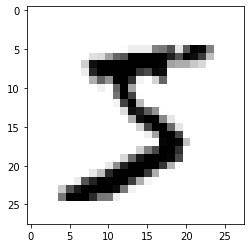

In [4]:
# Plot an example of the image

from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

In [5]:
y_train[0]

5

In [6]:
# Viewing the labels of output class. We can see there is total of 10 output classes

print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
# Performing One-Hot encoding - Function from keras (to_categorical)
# After this encoding, every label will be converted to a list with 10 elements
# and the element at index to the corresponding class will be set to 1, rest will be set to 0:
from tensorflow.keras.utils import to_categorical

# to_categorical helper function helps to automatically encode in One hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [8]:
# Making sure the encoding is successful

print(y_train_encoded.shape)
print(y_test_encoded.shape)
# So the neural network tries to predict which switch is on out of all
# 10 switches, instead of trying to predict a numeric value

(60000, 10)
(10000, 10)


In [9]:
# Displaying encoded labels 

y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
# Takes 784 input (28 * 28) and gives 10 output classes

import numpy as np
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [11]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [12]:
# Computation is usually fast when we normalize these values

x_mean = np.mean(x_train_reshaped)
x_std = np.mean(x_train_reshaped)

epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [13]:
print(set(x_train_norm[0]))

{-0.9999999999969986, -0.9099597198922427, 2.781691764402751, 3.0818260314186037, 4.252349672780431, 3.982228832466163, 6.653423808907256, 6.413316395294574, 2.811705191104336, 4.102282539272505, 6.593396955504086, 5.753021007859696, 6.2632492617866475, 1.341047282726656, 5.5729404476501845, 6.143195554980306, 3.1718663115233596, 0.9208593089044614, 4.612510793199455, 5.632967301053355, 5.03269876702165, 0.050469934558487375, -0.5197851727716336, 2.9617723246122627, -0.7298791596827308, 4.582497366497869, 1.1009398691139733, 5.2127793272311616, 5.392859887440673, 6.233235835085062, 1.7012084031456796, -0.21965090575578045, -0.3096911858605364, 0.3506042015743405, 4.162309392675676, 5.783034434561282, 6.203222408383477, 2.9017454712090918, 0.08048336126007269, 0.17052364136482864, 4.13229596597409, 1.4611009895329972, 4.942658486916893, 5.152752473827991, 5.362846460739088, 3.5020140052407984, -0.09959719894943919, -0.9699865732954133, -0.6698523062795602, 0.29057734817116987, -0.579812

In [14]:
# We create 2 hidden layers with 128 nodes, where all nodes of a layer
# will be completely connected to all nodes of other layer and

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    # If we use sequential class, we dont need to define input layer separately
    # We can use hidden layer
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # Softmax function gives the probability score for various nodes, in this case 10 nodes for output layer, which sum up to 1
])

In [15]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()
# Ouput
# Each node of dense_2(Dense) layer is connected to each node of the previous layer dense_1(Dense)
# so we have 128 * 10 = 1280 connections + biases for 10 nodes(10) = 1290 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2830 - accuracy: 0.9138
Epoch 2/3
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1317 - accuracy: 0.9603
Epoch 3/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0959 - accuracy: 0.9705


In [17]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
# evaluate takes the model state as it is and does a forward pass to understand
# prediction of model and compares that with actual labels (y_test_encoded)
print(accuracy*100)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.1185 - accuracy: 0.9630
96.29999995231628


In [18]:
preds = model.predict(x_test_norm)
print('Shape of preds:', preds.shape)

Shape of preds: (10000, 10)


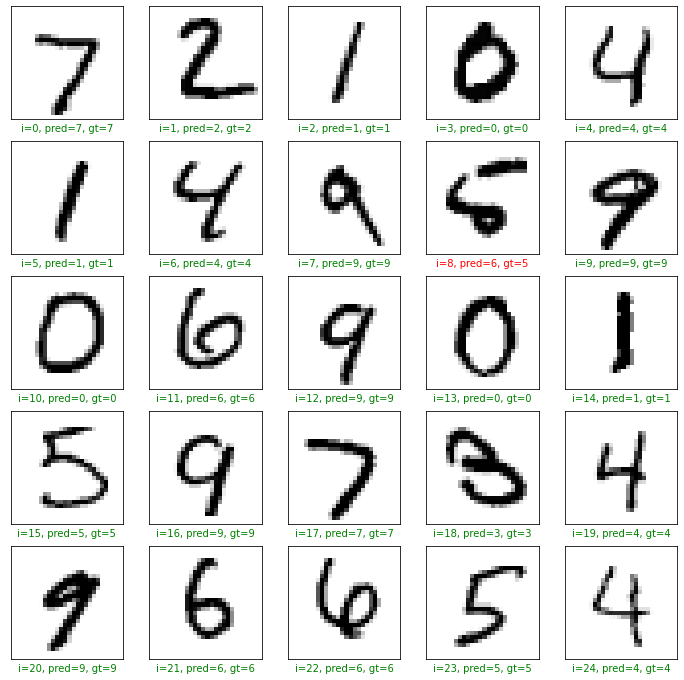

In [19]:
plt.figure(figsize=(12, 12))
start_index=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
# Highest prob score is the final output so we need to do some post processing
    pred =np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col='g'
    if pred != gt:
        col='r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='binary') # we cannot use normalize to show pics since pixel values are supposed to be from 0 to 255 also shape 
    # needs to be 28 * 28
plt.show()


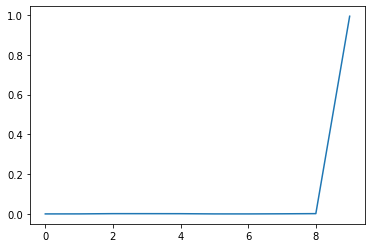

In [20]:
# Softmax probability outputs
plt.plot(preds[7])
plt.show()

# We can see that for i = 7, the actual value is 9 and the graph below shows the probability
# as 1 for i = 7